<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/evaluation01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#KneeTorque_KNN.ipynb
#Materials available at https://github.com/shakil1819/CSE442-Machine-Learning-Sessional/tree/main/Week%201%2B2


In [9]:
#Importing the library files...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Fetching the Dataset for training...
path="https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Week%201%2B2/KneeJoint_Data_(DrAkhter).csv"
df = pd.read_csv(path)
#Display the head tail of the DataFrame (first few rows)
print("Head of the DataFrame:")
print(df.head())
print("tail of the DataFrame:")
print(df.tail())


Head of the DataFrame:
    BH(m)  BW(kg)  KneeLength(m)  Leg_Weight  Torque(Nm) Torque_category
0  1.7526    75.0        0.50292        2.22   11.653651               M
1  1.7272    71.0        0.47244        2.19   10.872237               M
2  1.6764    71.0        0.47752        2.13   10.552465               M
3  1.7272    74.0        0.50292        2.22   11.331627               M
4  1.7780    68.0        0.50070        2.20   10.719107               M
tail of the DataFrame:
      BH(m)  BW(kg)  KneeLength(m)  Leg_Weight  Torque(Nm) Torque_category
335  1.8796   120.0         0.5206        4.09   19.996989              VH
336  1.8796   132.0         0.5404        4.15   21.996688              VH
337  1.8796   133.0         0.5408        4.09   22.163330              VH
338  1.8796   129.0         0.5400        3.95   21.496763              VH
339  1.8796   128.0         0.5307        4.05   21.330122              VH


## Code to check NULL values in a data-frame with corresponding outputs

In [12]:
#Null value count
df.isnull().sum()

BH(m)              0
BW(kg)             0
KneeLength(m)      0
Leg_Weight         0
Torque(Nm)         0
Torque_category    0
dtype: int64

## Dropping the NULL value records


In [13]:
df1 = df.dropna()
df1.tail(10)

,BH(m),BW(kg),KneeLength(m),Leg_Weight,Torque(Nm),Torque_category
330,1.8542,126.0,0.5207,4.09,20.713098,VH
331,1.8542,118.0,0.5201,3.97,19.397980,VH
332,1.8796,134.0,0.5202,3.95,22.329971,VH
333,1.8796,136.0,0.5308,4.25,22.663254,VH
334,1.8796,126.0,0.5201,3.99,20.996839,VH
335,1.8796,120.0,0.5206,4.09,19.996989,VH
336,1.8796,132.0,0.5404,4.15,21.996688,VH
337,1.8796,133.0,0.5408,4.09,22.163330,VH
338,1.8796,129.0,0.5400,3.95,21.496763,VH
339,1.8796,128.0,0.5307,4.05,21.330122,VH


## Determining dependent and independent features


In [16]:
# Extract the required torque and drop weight-height ratio, internal moment, and torque category columns
y = df1['Torque(Nm)']
X = df1.drop([ 'Torque(Nm)', 'Torque_category'], axis=1)

X.describe()

,BH(m),BW(kg),KneeLength(m),Leg_Weight
count,340.000000,340.000000,340.000000,340.000000
mean,1.651822,73.854412,0.481400,2.304765
std,0.149952,19.719233,0.036357,0.632591
min,1.371600,49.000000,0.410100,1.340000
25%,1.498600,59.000000,0.450325,1.810000
50%,1.701800,69.000000,0.486220,2.205000
75%,1.778000,82.000000,0.508000,2.590000
max,1.879600,136.000000,0.601000,4.250000


## Splitting Train and Test data

In [17]:
# Splitting Train and Test data (75% & 25%, respectively)
from sklearn.model_selection import train_test_split
#SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

len(X)	     #57
len(X_train) # 42
len(X_test)  # 15
X_test

,BH(m),BW(kg),KneeLength(m),Leg_Weight
103,1.5240,58.0,0.48230,1.67
37,1.7907,63.0,0.45212,2.41
98,1.7018,68.0,0.48768,2.41
52,1.7018,57.0,0.48260,1.92
187,1.4478,53.0,0.45040,1.54
...,...,...,...,...
337,1.8796,133.0,0.54080,4.09
100,1.5240,52.0,0.46230,1.67
320,1.8288,108.0,0.52080,3.52
200,1.4732,62.0,0.42040,1.89


## Creating a test dataset with single record

In [18]:
X_test2 = X_test[:1]
X_test2

,BH(m),BW(kg),KneeLength(m),Leg_Weight
103,1.524,58.0,0.4823,1.67


## Feature Scaling for KNN Regression

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only on x_train...
scaler.fit(X_train)
X_t = X_test
X_t2 = X_test2
# Scale both X_train and X_test...
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test2 = scaler.transform(X_test2)


# K-NN Regression

###  Training and Predicting using K-NN Regression

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regressor
K = 5
regressor = KNeighborsRegressor(n_neighbors=K)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predict the required torque for the test data
y_pred = regressor.predict(X_test)

# Print the predicted torque
print(y_pred)


[ 7.89070385 10.30045365 10.17628315  8.49489216  6.93904533  6.71115172
 13.60245649 13.43671568 17.29874682  7.57228333 10.4916636  13.62632677
 17.07580741  6.6129683  17.57348023  7.36510731 10.2450791  14.98378005
  9.68435272 10.01560915  6.71250287 20.60680731 11.17894751 10.32941325
 10.79026729 16.89925742 12.52379007 13.49481504  7.28989341 13.84025853
  7.23674826  7.75739059 11.31721498  6.86428182 11.27870726 10.33493044
  9.77150176 13.56282282 10.76954969  8.80768291 19.2295372  13.50652499
 15.79356804 11.75048308  6.71295325 21.35624402 16.12504966  7.02686995
 10.46103758 17.29874682 13.60245649  7.16243512 15.31391052 15.43146039
  9.04368341 19.45653005 12.24883147 21.18915207  9.95480749 11.00012308
  9.92778453 20.60680731 10.46283911 13.52408991 13.32321926 13.43671568
 21.32336609  6.94850337  9.34206191  8.56898011  7.02686995  6.86067876
  6.9088697  10.16896444  8.63023215  7.67992478 13.27728023  7.93123829
  7.02686995  7.41104634  7.4952679   7.77945934  7

###  Predicting for a single record as test

In [32]:
y_pred2 = regressor.predict(X_test2)
y_pred2

array([7.89070385])

In [33]:
pred_df = X_t2
pred_df

,BH(m),BW(kg),KneeLength(m),Leg_Weight
103,1.524,58.0,0.4823,1.67


### Evaluating the results for K-NN Regression

In [38]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, precision_score

# Evaluating the Algorithm for Kai Regression...
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('F1 Score:', f1)


ValueError: ignored

In [35]:
#R2 can be calculated
regressor.score(X_test,y_test)

0.9919546980094747

In [36]:
y.describe()

count    340.000000
mean      11.009535
std        3.801945
min        6.289594
25%        7.836658
50%       10.255213
75%       12.741325
max       22.663254
Name: Torque(Nm), dtype: float64

### Finding the Best K for K-NN Regression

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Finding the best i for non regression...
error = []

# calculating error for values between 1 and 29
for i in range(1, 30):
    # Create a KNN regressor with k neighbors
    knn = KNeighborsRegressor(n_neighbors=i)

    # Fit the regressor to the training data
    knn.fit(X_train, y_train)

    # Predict the required torque for the test data
    pred_i = knn.predict(X_test)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, pred_i)

    # Append the mean absolute error to the error list
    error.append(mae)

NameError: ignored

Text(0, 0.5, 'Mean Absolute Error (MAE)')

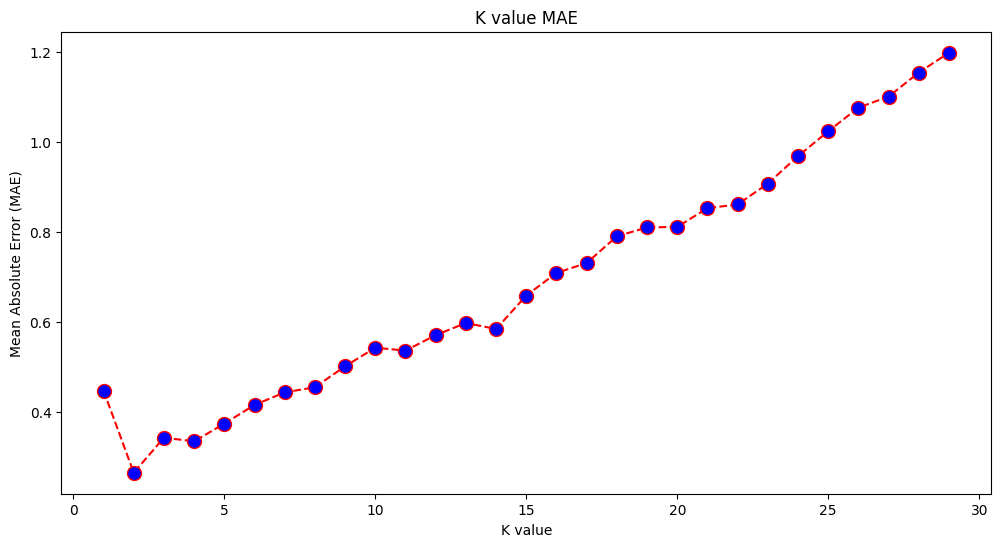

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('K value MAE')
plt.xlabel('K value')
plt.ylabel('Mean Absolute Error (MAE)')

###  Predicting with minimum error position as K=2

In [ ]:
import numpy as np

# print(min(error))
# print(np.array(error).argmin())
print(min(error[2:]))
# print(np.array(error[2:]).argmin()+2)
K_neigh = np.array(error[2:]).argmin()+2

knn_reg = KNeighborsRegressor(n_neighbors=4)
knn_reg.fit(X_train,y_train)
y_pred_reg = knn_reg.predict(X_test)
r2_reg = knn_reg.score(X_test,y_test)

mae_reg = mean_absolute_error(y_test,y_pred_reg)
mse_reg = mean_squared_error(y_test,y_pred)
rmse_reg = mean_squared_error(y_test,y_pred_reg,squared=False)
print(f'r2: {r2_reg}, \name: {mae_reg}, \nmse: {mse_reg} \nmrse: {rmse_reg}')

0.334232692307693
r2: 0.9310267102194476, 
ame: 0.334232692307693, 
mse: 0.20652977200000017 
mrse: 0.4451129351614906


#  K-NN Classification with Scikit-Learn

In [ ]:
dfc = df.dropna()
y = dfc['Torque Category']
X = dfc.drop(['Weight-Height Ratio (R)','Internal Moment (M)','Required Torque (N-m)','Torque Category'],axis = 1)

### Splitting dataset and feature scaling

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
#SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)# random_state=SEED)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)